In [1]:
!pip install swig

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.6 MB 762.6 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/2.6 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.3/2.6 MB 1.5 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.6 MB 1.6 MB/s eta 0:00:02
   ------- -------------------------------- 0.5/2.6 MB 1.6 MB/s eta 0:00:02
   ----------- ---------------------------- 0.7/2.6 MB 2.2 MB/s eta 0:00:01
   -------------- ------------------------- 0.9/2.6 MB 2.4 MB/s eta 0:00:01
   --------------- ------------------------ 1.0/2.6 MB 2.3 MB/s eta 0:00:01
   ------------------ --------------------- 1.2/2.6 MB 2.4 MB/s eta 0:00:01
   ------------------- -------------------- 1.3/2.6 MB 2.5 MB/s eta 0:00:01
   --------------------- ------------------ 1.3/2.6 MB 2.6 MB/s eta 0:00:01
   ---------------------

In [2]:
!pip install gymnasium[box2d]


     ---------------------------------------- 0.0/374.4 kB ? eta -:--:--
     --- ----------------------------------- 30.7/374.4 kB 1.3 MB/s eta 0:00:01
     -------------- ----------------------- 143.4/374.4 kB 1.7 MB/s eta 0:00:01
     ---------------------------- --------- 276.5/374.4 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 374.4/374.4 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.7 MB 4.8 MB/s eta 0:00:03
    --------------------------------------- 0.2/10.7 MB 3.5 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.7 MB 2.8 MB/s eta 0:00:04
   - -------------------------------------- 0.5/10.7 MB 3.0 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/10.7 MB 3.1 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/10

Rules:

- Car starts at random position (-0.6 < x < -0.4) no velocity v = 0
- x varies between −1.2 and 0.6 in the x-axis (with x ≈ −0.53 the lowest
height)
- Velocity v between -0.07 and 0.07
- The agent can take three
different actions: accelerate the car to the left (0), do not accelerate (1), and
accelerate the car to the right (2)

Terminate:
- x >= 0.5
- auto-stop after 200 iterations

In [15]:
import gymnasium as gym
env = gym.make("MountainCar-v0", render_mode="human")
observation, info = env.reset()
print('Starting observation:', observation)

# Create a loop with an adequate number of iterations to run the simulation
for i in range(200):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    # select a random action from the action space and execute it
    if terminated or truncated:
        observation, info = env.reset()
        break

print('Finished observation in %i steps' %i)
env.close()


Starting observation: [-0.49959692  0.        ]


Instead of selecting a random action, select accelerating the car to the
right at each time step.

i. Accelerate the car to the right if it is climbing the hill to the right
while increasing the velocity.

ii. Accelerate the car to the left if it is climbing the hill to the left while
decreasing the velocity.

In [19]:
import gymnasium as gym
env = gym.make("MountainCar-v0", render_mode="human")
observation, info = env.reset()
print('Starting observation:', observation)

for i in range(200):
    # height = observation[0]
    # velocity = observation[1]

    # acceleration to the right (action 2)
    # if car is moving to the right and has a positive velocity (increasing)
    # if height > -0.53 and velocity > 0:
    if observation[0] > -0.53 and observation[1] > 0:
        action = 2

    # acceleration to the left (action 0)
    # if car is moving to the left and has a negative velocity (decreasing)
    # if height < -0.53 and velocity < 0:
    elif observation[0] < -0.53 and observation[1] < 0:
        action = 0
    else:
        action = 1 # do not accelerate (random action)

    observation, reward, terminated, truncated, info = env.step(action)
    print('Observation:', observation, 'Reward:', reward, 'Terminated:', terminated, 'Truncated:', truncated)

    if terminated or truncated:
        observation, info = env.reset()
        break
    
print('Finished observation in %i steps' %i)
env.close()


Starting observation: [-0.58785367  0.        ]
Observation: [-5.8737475e-01  4.7893295e-04] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5864204   0.00095434] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5849977   0.00142272] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.58311707  0.00188061] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5807925   0.00232463] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.57804096  0.00275148] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.574883    0.00315798] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5713419  0.0035411] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.56744397  0.00389795] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5632181   0.00422584] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5586958   0.00452229] Reward: -1.0 Terminated: False Truncate

i. Accelerate the car to the right if it is climbing the hill to the right
while increasing the velocity.

ii. Accelerate the car to the left if it is climbing the hill to the left while
decreasing the velocity.

iii. Accelerate the car to the right if it is descending the hill to the left
while increasing the velocity.

iv. Accelerate the car to the left if it is descending the hill to the right
while decreasing the velocity.

In [20]:
import gymnasium as gym
env = gym.make("MountainCar-v0", render_mode="human")
observation, info = env.reset()
print('Starting observation:', observation)

for i in range(200):
    # height = observation[0]
    # velocity = observation[1]

    # acceleration to the right (action 2)
    # if car is moving to the right and has a positive velocity (increasing)
    # if height > -0.53 and velocity > 0:
    # rule 1
    if observation[0] > -0.53 and observation[1] > 0:
        action = 2
    # rule 3
    elif observation[0] < -0.53 and observation[1] > 0:
        action = 2
    # acceleration to the left (action 0)
    # if car is moving to the left and has a negative velocity (decreasing)
    # if height < -0.53 and velocity < 0:
    # rule 2
    elif observation[0] < -0.53 and observation[1] < 0:
        action = 0
    # rule 4
    elif observation[0] > -0.53 and observation[1] < 0:
        action = 0
    else:
        action = 1 # do not accelerate (random action)

    observation, reward, terminated, truncated, info = env.step(action)
    print('Observation:', observation, 'Reward:', reward, 'Terminated:', terminated, 'Truncated:', truncated)

    if terminated or truncated:
        observation, info = env.reset()
        break
    
print('Finished observation in %i steps' %i)
env.close()


Starting observation: [-0.5861693  0.       ]
Observation: [-5.857028e-01  4.665278e-04] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.58377314  0.00192962] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5803947   0.00337848] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5755923   0.00480239] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5694015   0.00619076] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5618683  0.0075332] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.55304873  0.00881959] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.54300857  0.01004018] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.53182286  0.01118567] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.51957554  0.01224735] Reward: -1.0 Terminated: False Truncated: False
Observation: [-0.5063583   0.01321717] Reward: -1.0 Terminated: False Truncated: F

run the experiment 100
times and show the results using boxplots

Starting Mountain Car
Average number of steps for each approach
[199.   199.   176.98 118.91]


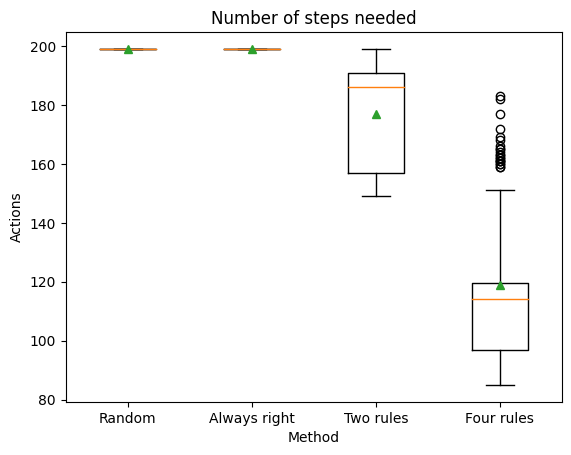

Closing environment


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym


def select_action(action_selection_code):
    if action_selection_code == 0:
        action = env.action_space.sample() #random action
    elif action_selection_code == 1:
        action = 2 #push to the right
    elif action_selection_code == 2:
        #two rules
        if observation[0] > -0.53 and observation[1] > 0:
          action = 2
        elif observation[0] < -0.53 and observation[1] < 0:
          action = 0
        else:
          action = 1
          
    elif action_selection_code == 3:
        #four rules
        if observation[0] > -0.53 and observation[1] > 0:
          action = 2
        elif observation[0] < -0.53 and observation[1] < 0:
          action = 0
        elif observation[0] < -0.53 and observation[1] > 0:
          action = 2
        elif observation[0] > -0.53 and observation[1] < 0:
          action = 0
        else:
          action = 1
        
    else:
      action = 1

    return action


print("Starting Mountain Car")
env = gym.make("MountainCar-v0")
# env = gym.make("MountainCar-v0", render_mode="human")
observation, info = env.reset()
iter = 200
agents = 100

#0: random action, 1: push to the right, 2: two rules, 3: four rules
approaches = 4

steps = np.zeros((agents, approaches))

for k in range(approaches):
    for j in range(agents):
        for i in range(iter):
            action = select_action(k) #0: random action, 1: push to the right, 2: two rules, 3: four rules
            observation, reward, terminated, truncated, info = env.step(action)
            # print(observation)
    
            if terminated or truncated:
                observation, info = env.reset()
                break
        
        # print("Finished approach", k, "in", i, "steps" )
        steps[j][k] = i

# calculate average number of steps
print("Average number of steps for each approach")
print(np.mean(steps, axis=0))

bp = plt.boxplot(steps, showmeans=True)
plt.title("Number of steps needed")
plt.xlabel("Method")
plt.ylabel("Actions")
plt.xticks(np.arange(1,5), ('Random', 'Always right', 'Two rules', 'Four rules'))
plt.show()

print("Closing environment")
env.close()

Possible Additional Rules and Modifications

Avoid Getting Stuck: 

If the car's velocity is very small, apply a push to prevent it from getting stuck in a local minimum.

Incorporate Momentum:

If the car is moving in a favorable direction (towards the goal) with sufficient velocity, maintain the push to capitalize on the momentum.

Balanced Pushes:

Alternate between pushing left and right to build momentum if the car is not making progress.

In [ ]:
# consider solving using SARSA or Q-learning
# challenge: if it never sees the reward, it can't learn a good policy. Random exploration isn't enough, since the car won't gather the momentum needed
# https://www.reddit.com/r/reinforcementlearning/comments/13hns0o/looking_for_advice_with_openai_gyms_mountain_car/

# SARSA
# https://www.youtube.com/watch?v=GAVajQVCy5w

# Q-learning
# https://www.youtube.com/watch?v=_SWnNhM5w-g
# idea: separate into segments to solve

# Student-friendly version
# https://www.youtube.com/watch?v=KzsBaqYzNLc